In [174]:
import pandas as pd
import geopandas as gpd
import os
import imageio
import matplotlib.pyplot as plt

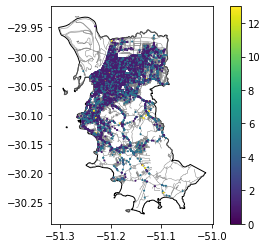

In [175]:
vmin, vmax = 0, 13
Dados = (r"C:\Users\Lizi\Python\AcidentesTransito\Dados\\")
Output = (r"C:\Users\Lizi\Python\AcidentesTransito\Output\\")
acidentes2018 = gpd.read_file(Dados+"ano_2018.shp")
poa_lim = gpd.read_file(Dados+"poa_lim.shp")
ruas = gpd.read_file(Dados+"eixos.shp")
base = poa_lim.plot(color='white', edgecolor='black')
ruasa = ruas.plot(ax=base, color = 'grey', linewidth=0.5, zorder=5)
fig = acidentes2018.plot(column = 'ups', ax=base, marker='o', markersize=1, vmin=vmin, vmax=vmax, legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax), zorder=10)

In [111]:
lista_mes = acidentes2018['mes'].unique()
print (lista_mes)
meses = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro","Novembro","Dezembro"]

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']


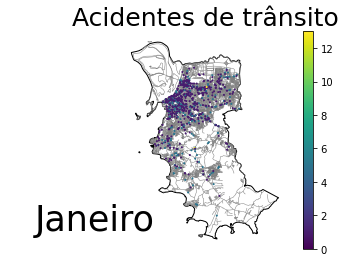

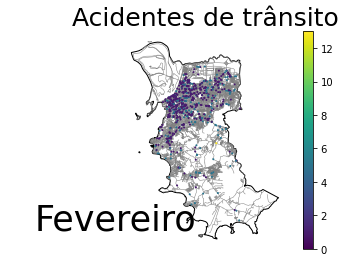

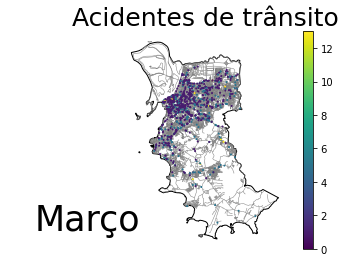

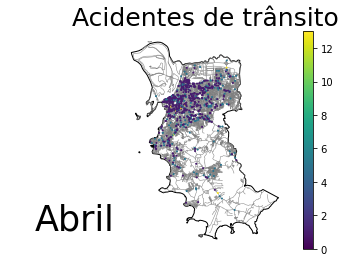

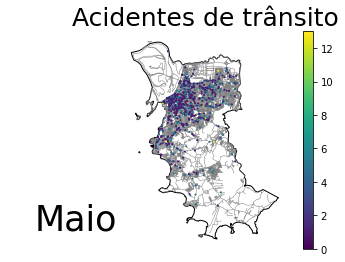

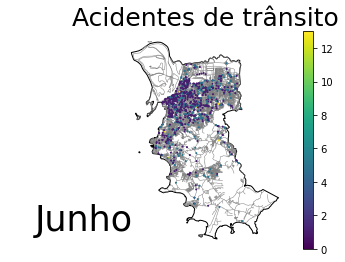

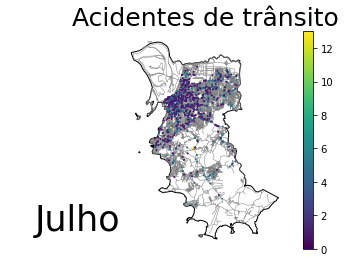

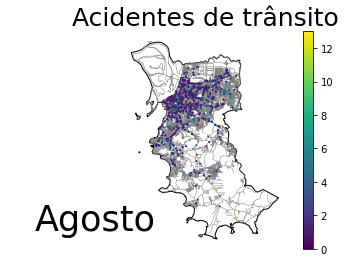

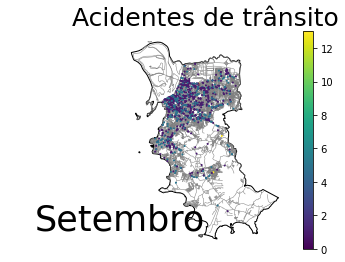

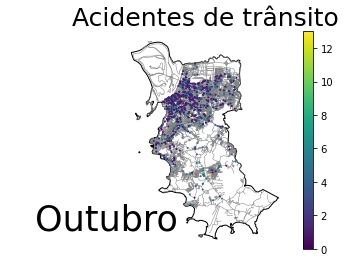

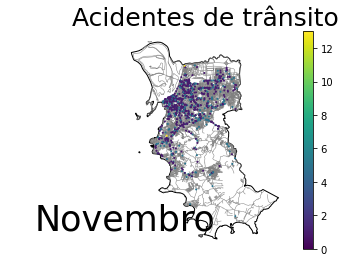

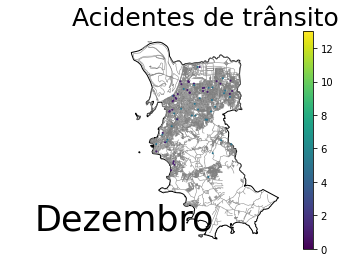

In [176]:
i = 0
images = []
for mes in lista_mes:
        base = poa_lim.plot(color='white', edgecolor='black')
        ruasa = ruas.plot(ax=base, color = 'grey', linewidth=0.5, zorder=5)
        acidentes2018a = acidentes2018[acidentes2018.mes == mes]
        
        fig = acidentes2018a.plot(column = 'ups', ax=base, marker='o', markersize=1, vmin=vmin, vmax=vmax, legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax), zorder=10)
        fig.axis('off')
        fig.set_title('Acidentes de trânsito', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
        fig.annotate(meses[i],
        xy=(0.1, .225), xycoords='figure fraction',
        horizontalalignment='left', verticalalignment='top',
        fontsize=35)
       
        filepath = os.path.join(Output, meses[i]+'_acidentes.jpg')
        chart = fig.get_figure()
        chart.savefig(filepath, dpi=300)
        
        images.append(imageio.imread(filepath))
        imageio.mimsave('Output'+'\movie.gif', images, fps=1)
    
        i = i+1 